# Exploratory Data Analysis

### An Investigation about Language Usage in Math Textbooks by Tommy Xu (Part 2)

In [27]:
import matplotlib.pyplot as plt
import matplotlib.figure as matfig
import matplotlib.collections as matcol
from wordcloud import WordCloud


### Exploratory Plots

To explore if there may be significant differences between different textbooks and language usage, I used the seaborn heatmap package to map out the letter occurrance frequencies in every textbook. All following textbooks are from OpenBC (https://open.bccampus.ca/browse-our-collection/find-open-textbooks/) to ensure **writing style** is at least somewhat similar.

In [3]:
import seaborn as sns
import pandas as pd

A variety of social studies textbooks were selected for the letter usage comparison across disciplines, while many different levels of math textbooks were selected for comparing letter usage within the same discipline but *across different difficulties*. Here, the books selected were:

**Social Studies**:
- US History
- American Government
- Business Law
- Macroeconomics
- Microeconomics
- Psychology

**Math**
- Pre-Algebra
- Elementary Algebra
- Intermediate Algebra
- Trigonometry
- Pre-Calculus
- Calculus 1
- Calculus 2
- Calculus 3

In [4]:
## Reading in data from src folder

## Math textbooks setting df index to Letter
elementary_openBC      = pd.read_csv("src/scripts/textbook_data/ElementaryAlgebra2e_OpenBCEducation_LetterData.csv").set_index("Letter")
intermediateAlg_openBC = pd.read_csv("src/scripts/textbook_data/IntermediateAlgebra2e_OpenBCEducation_LetterData.csv").set_index("Letter")
trig_openBC            = pd.read_csv("src/scripts/textbook_data/AlgebraAndTrigonometry_OpenBCEducation_LetterData.csv").set_index("Letter")
prealgebra_openBC      = pd.read_csv("src/scripts/textbook_data/PreAlgebra2e_OpenBCEducation_LetterData.csv").set_index("Letter")
precalculus_openBC     = pd.read_csv("src/scripts/textbook_data/PreCalculus_OpenBCEducation_LetterData.csv").set_index("Letter")
calculus1_openBC       = pd.read_csv("src/scripts/textbook_data/CalculusVolume1_OpenBCEducation_LetterData.csv").set_index("Letter")
calculus2_openBC       = pd.read_csv("src/scripts/textbook_data/CalculusVolume2_OpenBCEducation_LetterData.csv").set_index("Letter")
calculus3_openBC       = pd.read_csv("src/scripts/textbook_data/CalculusVolume3_OpenBCEducation_LetterData.csv").set_index("Letter")

## Non-math textbooks
USHistory_openBC   = pd.read_csv("src/scripts/textbook_data/USHistory_OpenBCEducation_LetterData.csv").set_index("Letter")
AmericanGov_openBC = pd.read_csv("src/scripts/textbook_data/AmericanGovernment2e_OpenBCEducation_LetterData.csv").set_index("Letter")
BusinessLaw_openBC = pd.read_csv("src/scripts/textbook_data/BusinessLawIEssentials_OpenBCEducation_LetterData.csv").set_index("Letter")
MacroEcon_openBC   = pd.read_csv("src/scripts/textbook_data/PrinciplesofMacroeconomics2e_OpenBCEducation_LetterData.csv").set_index("Letter")
MicroEcon_openBC   = pd.read_csv("src/scripts/textbook_data/PrinciplesofMicroeconomics2e_OpenBCEducation_LetterData.csv").set_index("Letter")
Psychology_openBC  = pd.read_csv("src/scripts/textbook_data/EvalutatingSexualViolenceTraining_OpenBCText_LetterData.csv").set_index("Letter")

Once read in, all the data within each discipline was combined into one dataframe, and all values were changed to relative by dividing by the total letter count of each book.

In [5]:
## Making dataframe for math textbooks to compare all the different difficulty levels
df_openBC_harderMath = pd.concat([prealgebra_openBC, elementary_openBC, intermediateAlg_openBC, trig_openBC, 
                                  precalculus_openBC, calculus1_openBC, calculus2_openBC, calculus3_openBC], axis = 1)
df_openBC_harderMath.columns = ["Pre-Algebra", "Elementary Algebra", "Intermediate Algebra", "Trigonometry", 
                                "Pre-Calculus", "Calculus 1", "Calculus 2", "Calculus 3"]

for column in df_openBC_harderMath:
    df_openBC_harderMath[column] = df_openBC_harderMath[column] / df_openBC_harderMath[column].sum()
    
df_openBC_harderMath = df_openBC_harderMath.transpose()

df_openBC_harderMath.loc[:,"a":"e"]

Letter,a,b,c,d,e
Pre-Algebra,0.073456,0.015732,0.038242,0.030131,0.127520
Elementary Algebra,0.075723,0.015458,0.034583,0.026819,0.121459
Intermediate Algebra,0.075416,0.014142,0.036232,0.025987,0.121875
Trigonometry,0.074145,0.013246,0.041468,0.025142,0.117046
Pre-Calculus,0.072701,0.012330,0.043779,0.024711,0.114801
Calculus 1,0.074557,0.012520,0.038707,0.029213,0.112956
Calculus 2,0.074159,0.013304,0.039904,0.029836,0.119145
Calculus 3,0.071484,0.011896,0.043644,0.034165,0.113921


In [6]:
## Making dataframe for math textbooks to compare with the social studies ones

df_openBC_math = pd.concat([prealgebra_openBC, elementary_openBC, precalculus_openBC, calculus1_openBC, 
                       calculus2_openBC, calculus3_openBC], axis = 1)
df_openBC_math.columns = ["Pre-Algebra", "Elementary Algebra", "Pre-Calculus", "Calculus 1", 
                          "Calculus 2", "Calculus 3"]

## Note: To match the length of the social studies data (6 textbooks), certain math textbooks that had similar letter patterns
##       and were of similar difficulty were removed from this dataframe.

for column in df_openBC_math:
    df_openBC_math[column] = (df_openBC_math[column] / df_openBC_math[column].sum())

df_openBC_math = df_openBC_math.transpose()

df_openBC_math.loc[:,"a":"e"]

Letter,a,b,c,d,e
Pre-Algebra,0.073456,0.015732,0.038242,0.030131,0.127520
Elementary Algebra,0.075723,0.015458,0.034583,0.026819,0.121459
Pre-Calculus,0.072701,0.012330,0.043779,0.024711,0.114801
Calculus 1,0.074557,0.012520,0.038707,0.029213,0.112956
Calculus 2,0.074159,0.013304,0.039904,0.029836,0.119145
Calculus 3,0.071484,0.011896,0.043644,0.034165,0.113921


In [7]:
## Making dataframe for social studies textbooks to compare with the math ones

df_openBC_nonMath = pd.concat([MicroEcon_openBC, MacroEcon_openBC, AmericanGov_openBC, USHistory_openBC, 
                               Psychology_openBC, BusinessLaw_openBC], axis = 1)
df_openBC_nonMath.columns = ["Microeconomics", "Macroeconomics", "American Government", "US History", 
                             "Psychology", "Business Law"]

for column in df_openBC_nonMath:
    df_openBC_nonMath[column] = (df_openBC_nonMath[column] / df_openBC_nonMath[column].sum())

df_openBC_nonMath = df_openBC_nonMath.transpose()
# df_openBC_nonMath = df_openBC_nonMath["v":].transpose().round(3)

df_openBC_nonMath.loc[:,"a":"e"]

Letter,a,b,c,d,e
Microeconomics,0.067926,0.012255,0.051837,0.028801,0.110827
Macroeconomics,0.073571,0.013023,0.051458,0.031633,0.114173
American Government,0.070845,0.011937,0.040606,0.032277,0.119750
US History,0.076599,0.010965,0.040617,0.032281,0.114949
Psychology,0.072139,0.011160,0.041947,0.036535,0.122035
Business Law,0.080279,0.015380,0.042967,0.031266,0.116292


Once all read in, we can begin the plotting. The seaborn heatmap package allows for a very straightforward way to explore any variations in letter usage across different books. This will guide the analysis in Notebook [3]. Additionally, to fully discern the differences, some plots are **limited only to the letter "v" and after in the alphabet**, as that was hypothesized to be the significant difference between math and non-math texts, and between easier and harder math texts. Below is an example, using the math textbooks.

Text(0.5, 1.025, 'Comparing Letter Usage (%) in Math Textbooks of Different Levels')

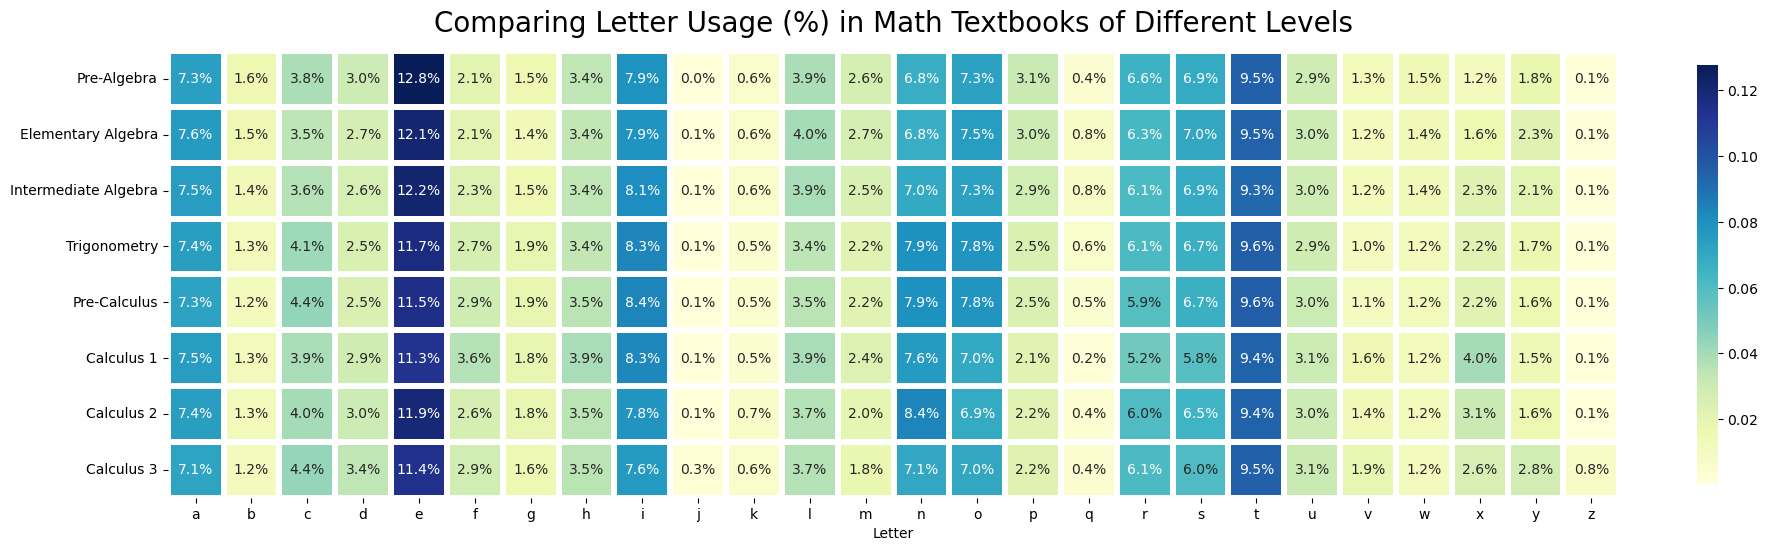

In [49]:
plt.figure(figsize=(20,20))
# ax = plt.axes()
sns.heatmap(df_openBC_harderMath,square = True, annot = True, cmap= "YlGnBu",
            linecolor = "white", linewidth = 4, cbar_kws={'fraction' : 0.0135}, fmt = ".1%")
plt.title('Comparing Letter Usage (%) in Math Textbooks of Different Levels', fontsize = 20, y = 1.025)

# plt.show()


## Deprecated in recent matplotlib release
# cbar = plt.axes().collections[0].colorbar
# cbar.set_ticks([0.02, 0.04, 0.06, 0.08, 0.1, 0.12])
# cbar.set_ticklabels(['2%', '4%', '6%', '8%', "10%", "12%"])

From the full alphabet plots, there are some observations we can make:
- The usage of f, v, and x largely increases with textbook difficulty.
- The usage of z is significantly higher in the Calculus 3 textbook than all other textbooks.
- The sum of v, x, y, and z usage is highest in Calculus 3, common letters used for multivariable and vector calculus.
- There is a slight but consistent decrease in the usage of b, e, m, p.
- All three calculus textbooks have notably less usage of o.

However, in general, it seems that their language usage patterns are rather similar, and most of the differences are concentrated from v to z. Thus, in the following analysis, v-to-z plots will also be provided as a supplementary plot.

Text(0.5, 1.025, 'Comparing v, w, x, y, z usage in Math Textbooks of Different Education Levels')

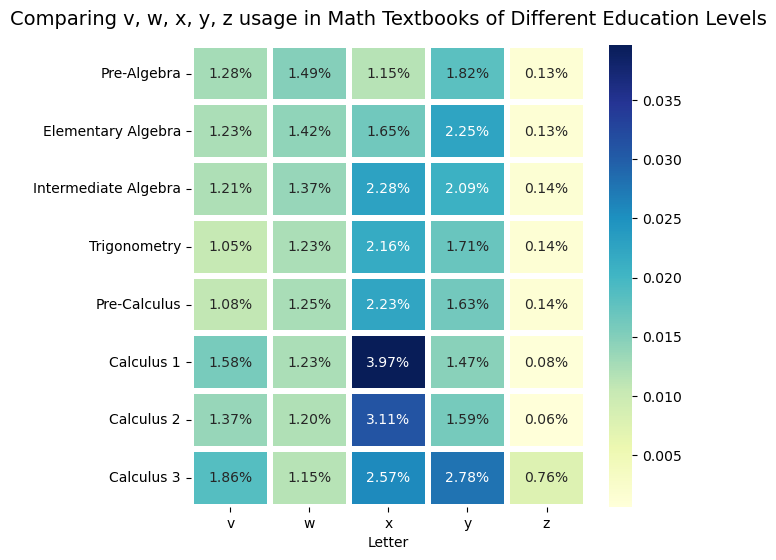

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(df_openBC_harderMath.loc[:,"v":], annot = True, cmap= "YlGnBu", 
            linecolor = "white", linewidth = 4, cbar_kws={'fraction' : 0.1}, fmt = ".2%")
plt.title('Comparing v, w, x, y, z usage in Math Textbooks of Different Education Levels', fontsize = 14, y = 1.025)

# cbar = plt.axes().collections[0].colorbar
# cbar.set_ticks([0.01, 0.02, 0.03, cbar.vmax-0.0005])
# cbar.set_ticklabels(['1%', '2%', '3%', '4%'])


The differences are much more noticable within the v-to-z plots of these different textbooks. There **definitely** seems to be a trend of increasing x usage as difficulty increases, which was the original hypothesis.

Next, we examine the comparison between math textbooks and non-math textbooks. First, the full alphabet plots:

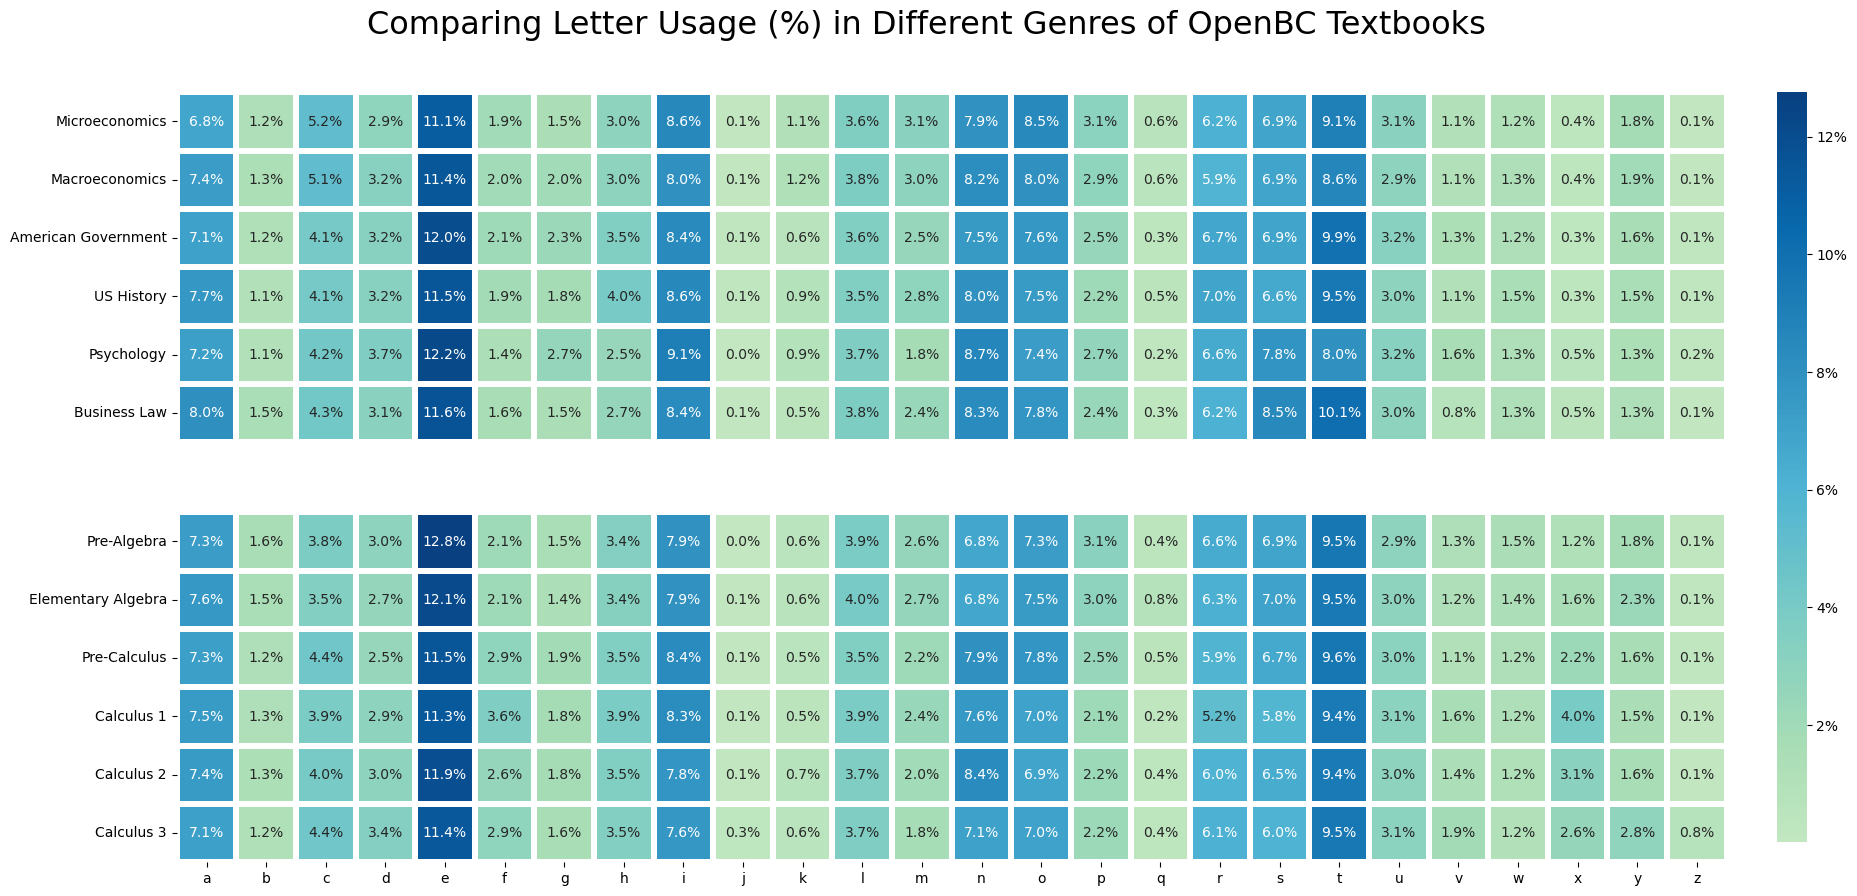

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), sharex = True)

colour_mean = ((df_openBC_math.stack().mean()) + (df_openBC_nonMath.stack().mean()))/2
colour_min = min(df_openBC_math.values.min(), df_openBC_nonMath.values.min())
colour_max = max(df_openBC_math.values.max(), df_openBC_nonMath.values.max())

cbar_ax = fig.add_axes([0.925, 0.13, .015, .75])        ## making a combined color bar
plt.suptitle('Comparing Letter Usage (%) in Different Genres of OpenBC Textbooks',y = 0.9625,fontsize = 23)

sns.heatmap(df_openBC_nonMath, annot = True, cmap= "GnBu", linecolor = "white", linewidth = 4, ax = ax1,
            cbar_kws={'fraction' : 0.05}, vmin = colour_min, vmax = colour_max, center = colour_mean, 
            fmt = ".1%", cbar = False)
ax1.xaxis.set_visible(False)

sns.heatmap(df_openBC_math, annot = True, cmap= "GnBu", linecolor = "white", linewidth = 4, ax = ax2,
            cbar_kws={'fraction' : 0.05}, vmin = colour_min, vmax = colour_max, center = colour_mean, 
            fmt = ".1%", cbar_ax = cbar_ax)
ax2.set_xlabel('')

cbar = ax2.collections[0].colorbar
cbar.set_ticks([0.02, 0.04, 0.06, 0.08, 0.1, 0.12])
cbar.set_ticklabels(['2%', '4%', '6%', '8%', "10%", "12%"])

plt.show()

To my surprise, the language patterns of non-math and math textbooks are not very dissimilar. Perhaps, this is because no matter the discipline, textbooks are still **primarily writing-based, focused on communication and teaching**, and so most of regular academic language stays the same. Of course, there are still some significant differences between the two groups:
- The usage of x is markedly higher in all math textbooks compared to all non-math textbooks
- The usage of f and q are also moderately higher in all math textbooks than in all non-math textbooks

Now, we can examine the v-to-z plots, which may show us the more distinct differences in "algebra letters".

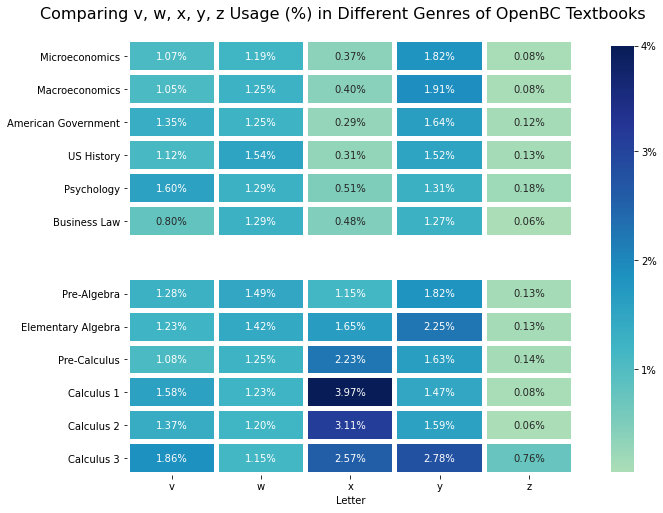

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex = True)

colour_mean = ((df_openBC_math.loc[:,"v":].stack().mean()) + (df_openBC_nonMath.loc[:,"v":].stack().mean()))/2
col_min = min(df_openBC_math.loc[:,"v":].values.min(), df_openBC_nonMath.loc[:,"v":].values.min())
col_max = max(df_openBC_math.loc[:,"v":].values.max(), df_openBC_nonMath.loc[:,"v":].values.max())

cbar_ax = fig.add_axes([0.965, 0.13, .04, .74])
plt.suptitle('Comparing v, w, x, y, z Usage (%) in Different Genres of OpenBC Textbooks', y = 0.9375, fontsize = 16)

sns.heatmap(df_openBC_nonMath.loc[:,"v":], annot = True, cmap= "YlGnBu", linecolor = "white", linewidth = 4, 
            ax = ax1, center = colour_mean, vmin = col_min, vmax = col_max, fmt = ".2%", 
            cbar = False,cbar_ax = cbar_ax)
ax1.xaxis.set_visible(False)

sns.heatmap(df_openBC_math.loc[:,"v":], annot = True, cmap= "YlGnBu", linecolor = "white", linewidth = 4, 
            ax = ax2, center = colour_mean, vmin = col_min, vmax = col_max, fmt = ".2%",
            cbar_ax = cbar_ax)

cbar = ax2.collections[0].colorbar
cbar.set_ticks([0.01, 0.02, 0.03, col_max])
cbar.set_ticklabels(['1%', '2%', '3%', '4%'])

plt.show()

Here, we can see that the differences in the letter "x" is **very significant** between the two groups. Further, we can see that *overall*, the letter usage of v, w, x, y, z is generally higher (corresponding to a darker colour) for math textbooks and non-math textbooks.

### WordClouds

In [ ]:
### To be combined